In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


In [0]:
print(train_images.shape)
print(len(train_images))
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train_labels)

(50000, 32, 32, 3)
50000
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


**20% of training data for simple hold-out validation**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(y_train)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [2]
 [5]
 ...
 [8]
 [8]
 [8]]


**One-hot encoded labels**

In [0]:
from keras.utils import to_categorical

y_train_cate = to_categorical(y_train)
y_val_cate = to_categorical(y_val)
train_labels_cate = to_categorical(train_labels)
test_labels_cate = to_categorical(test_labels)

In [0]:
print(y_train_cate.shape)
print(y_val_cate.shape)
print(train_labels_cate.shape)
print(test_labels_cate.shape)
print(y_train[0])
print(y_train_cate[0])

(40000, 10)
(10000, 10)
(50000, 10)
(10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 3 conv layer CNN model (a base model, no dropout, etc)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

model = Sequential()
# conv layers
# 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(2, 2))
# 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
# 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer = 'adam',
    metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flat

# Simple hold-out validation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 256

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    X_train,
    y_train_cate,
    batch_size=batch_size
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow(
    X_val,
    y_val_cate,
    batch_size=batch_size
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=X_train.shape[0] / batch_size,
    epochs=75,
    validation_data=validation_generator,
    validation_steps=X_val.shape[0] / batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
157/156 [==============================] - 32s 202ms/step - loss: 1.9353 - acc: 0.2813 - val_loss: 1.6394 - val_acc: 0.3995
Epoch 2/75
157/156 [==============================] - 31s 195ms/step - loss: 1.7142 - acc: 0.3726 - val_loss: 1.4928 - val_acc: 0.4523
Epoch 3/75
157/156 [==============================] - 30s 194ms/step - loss: 1.6143 - acc: 0.4158 - val_loss: 1.3716 - val_acc: 0.5077
Epoch 4/75
157/156 [==============================] - 30s 194ms/step - loss: 1.5521 - acc: 0.4408 - val_loss: 1.4737 - val_acc: 0.4787
Epoch 5/75
157/156 [==============================] - 31s 199ms/step - loss: 1.4891 - acc: 0.4642 - val_loss: 1.3535 - val_acc: 0.5198
Epoch 6/75
157/156 [==============================] - 32s 201ms/step - loss: 1.4536 - acc: 0.4780 - val_loss: 1.2689 - val_acc: 0.5495
Epoch 7/75
157/156 [==============================] - 30s 193ms/step - loss: 1.4005 - acc: 0.5017 - val_loss: 1.3081 - val_acc: 0.5278
Epoch 8

# Curves of loss and accuracy

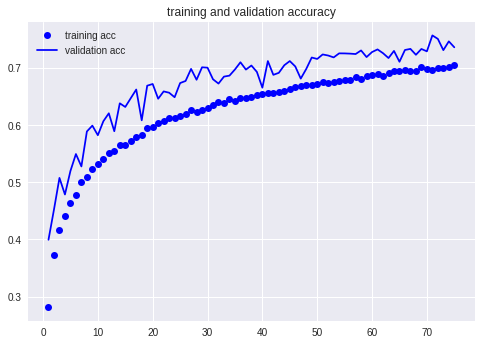

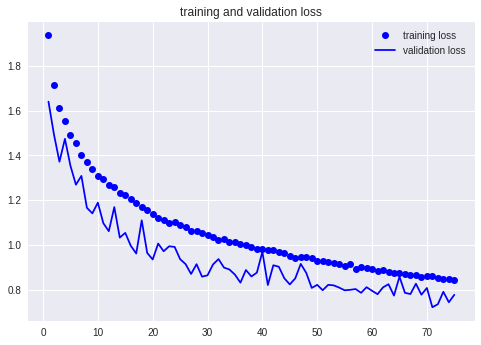

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()